In [32]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [33]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq
llm=ChatGroq(model="openai/gpt-oss-20b")    

system = """You are a  chat assistant of user question. \n 
    Answer all questions to the best of your ability. """
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", " User question: {question}"),
    ]
)
rag_chain = prompt | llm | StrOutputParser()


In [34]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [35]:
class State(TypedDict):
    messages:Annotated[list,add_messages] #input messages

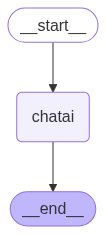

In [36]:
graph=StateGraph(State)

## node
graph.add_node("chatai",chatai)
## Edges

graph.add_edge(START,"chatai")
graph.add_edge("chatai",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [37]:
for event in graph_builder.stream({"messages":"what is capital of india?"}):
    print(event)

{'chatai': {'messages': ['The capital of India is **New\u202fDelhi**.']}}


In [38]:
graph_builder.invoke({'messages':"what is capital of india?"})

{'messages': [HumanMessage(content='what is capital of india?', additional_kwargs={}, response_metadata={}, id='c1c684f7-5d77-4132-982d-1fce5e2e114b'),
  HumanMessage(content='The capital of India is **New\u202fDelhi**.', additional_kwargs={}, response_metadata={}, id='b31a00c6-0a29-4bb6-b9c6-408b2c1b3235')]}

In [39]:
def chatai(State:State):
    return {"messages":[rag_chain.invoke(State['messages'])]}

In [40]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-20b")

In [41]:
def chatbot(State:State):
    return {"messages":[llm_groq.invoke(State['messages'])]}

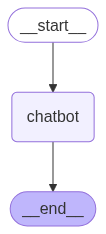

In [42]:
graph=StateGraph(State)

## node
graph.add_node("chatbot",chatbot)
## Edges

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [43]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'chatbot': {'messages': [AIMessage(content='Hello KRish! 👋 I’m ChatGPT, here to help with whatever you need—whether it’s answering questions, brainstorming ideas, or just chatting. How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hello My name is KRish". They haven\'t asked a question. We can respond politely, introduce ourselves, ask what they need.'}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 77, 'total_tokens': 156, 'completion_time': 0.068655705, 'prompt_time': 0.006343064, 'queue_time': 0.044590956, 'total_time': 0.074998769}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8b7d6dfc-40b0-4745-b2f1-f073924507a8-0', usage_metadata={'input_tokens': 77, 'output_tokens': 79, 'total_tokens': 156})]}}


In [44]:
graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='d06afb41-5806-4ef7-86a1-a3284d078f27'),
  AIMessage(content='Hey Krish! 👋🏼 Great to meet you—cricket is a fantastic sport. What’s your favorite team or player? Or maybe you’re more into the strategy side of things? Let me know!', additional_kwargs={'reasoning_content': 'User says: "Hi,My name is Krish And I like cricket". We should respond in friendly manner. Also user may want to talk about cricket. We can ask them about cricket. There\'s no conflict with policy. So just respond.'}, response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 82, 'total_tokens': 184, 'completion_time': 0.088513101, 'prompt_time': 0.006608123, 'queue_time': 0.044778274, 'total_time': 0.095121224}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fd68d84dd3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8e6cdf12-a5